In [2]:
# HIDDEN - sets path

import sys
sys.path.insert(1, '../..')

# Get identifiers
The most direct and robust way to load a TrendMiner object is typically to load it directly from its identifier, which will typically take the form of a UUID (universally unique identifier), for example `b6f7eda-5c15-42e2-9aa3-d47d40aa993d`.

Knowing what the identifier is for an object is tricky, however, as it is rarely displayed anywhere in TrendMiner (sometimes in the url). In this guide we will go over a quick way to find the identifiers of objects from the browser. 

## Workflow
### Open the Network tab in your browser
This tab shows all the network traffic that we send and receive to/from the appliance. The requests that appear here will include the object identifiers that we can then copy from here.

You can open the Network by right clicking anywhere in the browser (with TrendMiner open), then selecting `Inspect` (or something similar-sounding, depending on the browser) in the list of options that pops up. This should open up a panel on the right, in which you should be able to select a tab called `Network`.

You can already filter the requests to come by selecting `Fetch/XHR`. That will reduce the amount of requests you have to shift through to find your identifiers.

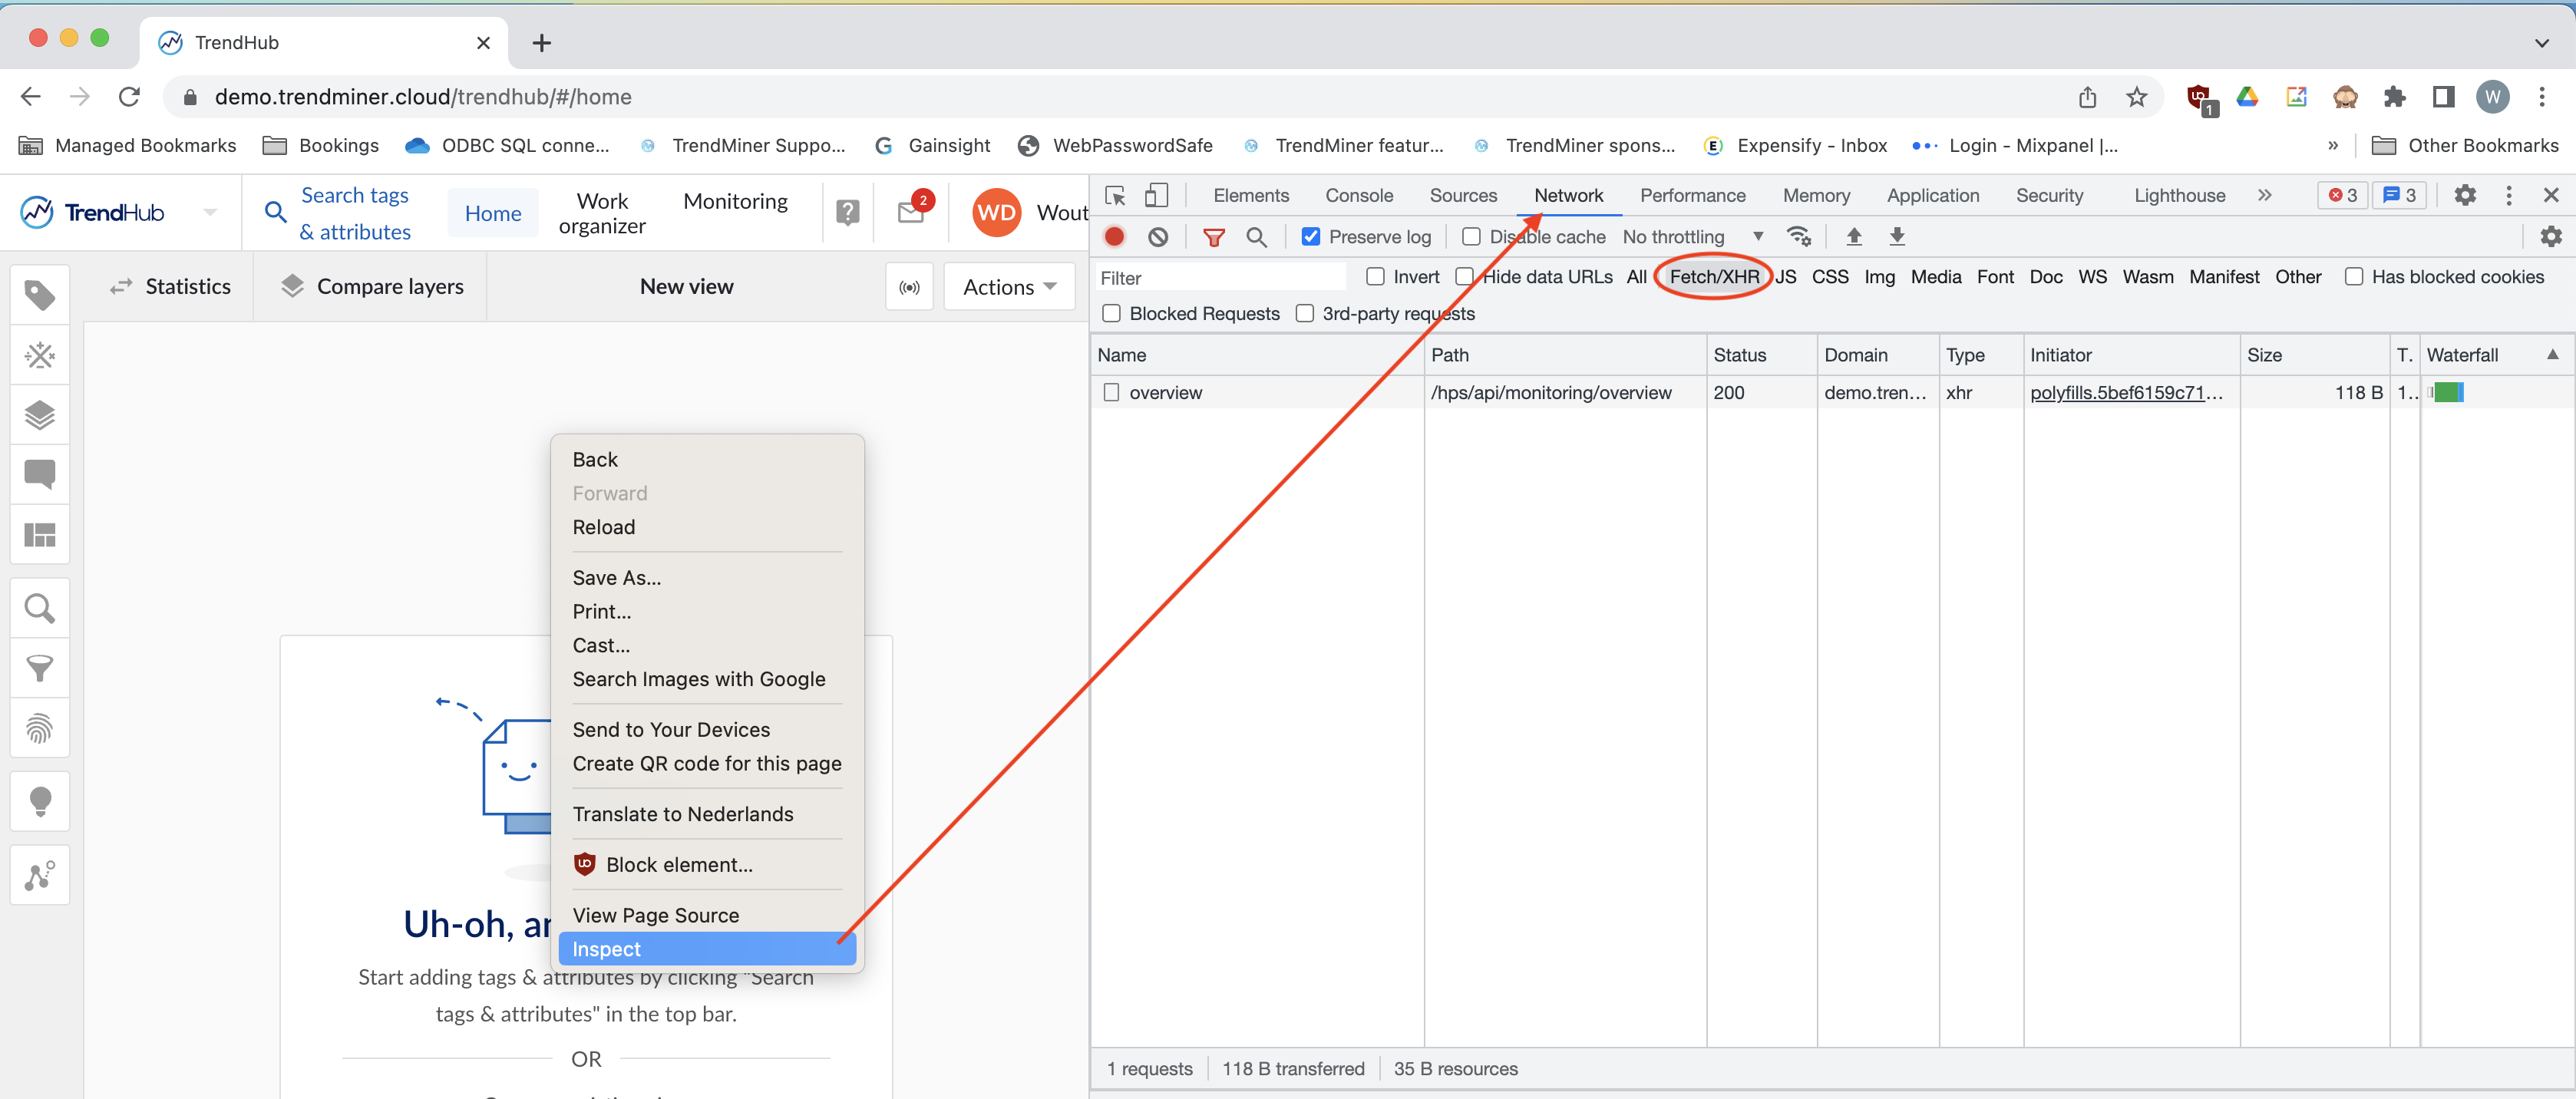

### Load the item
Load or add the item you want to get the identifier from. You will typically see a bunch of requests happening. The one you need (that contains the identifier) should be the one that occurs right after you clicked to load the item. The name of the request can differ, it can be the UUID itself, but also `path`, `enriched`, or many others.

Below is an example where we load a ContextHub view from the work organizer. We can ignore the first requests (which are us browsing the work organizer) and have a look at the request named `path` that happens right as we click to load the view. In the `Headers` tab, we can read from the `Request URL` that our identifier is `c7582dc1-b7f8-4d11-9632-17eaaf185fa2`.

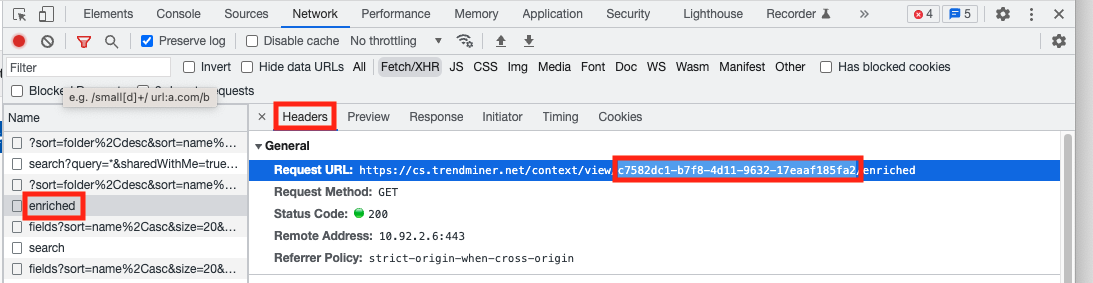

## Loading by id: example
We can now load this ContextHub view by its identifier. Remember that we need to authenticate as a user that has access to this view (owner, or through sharing).

In [7]:
import keyring
from trendminer_interface import TrendMinerClient

url = "https://cs.trendminer.net"
client_id = "tmInterfaceClient"
username = "wdaniels"

client = TrendMinerClient(
    url = url,
    client_id = client_id,
    client_secret=keyring.get_password(url, client_id),
    username = username,
    password = keyring.get_password(url, username),  
    tz="Europe/Brussels"
)

client.context.view.from_identifier("c7582dc1-b7f8-4d11-9632-17eaaf185fa2")

<< ContextHubView | test >>

## Context items
An important note on context items is that we can also load them by their unique shortkey, which is nice and visible in the UX.

-
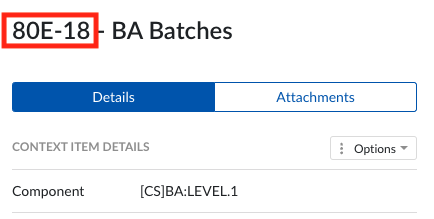

In [9]:
client.context.item.from_identifier("80E-18")

<< ContextItem | BATCH_DEMO | 1:10:00 >>